# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## En la Bici Bike Data

In [63]:
bikes_df = pd.read_csv('../data/enlabici-mend.csv')
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     22 non-null     object 
 1   latitude         22 non-null     float64
 2   longitude        22 non-null     float64
 3   bikes_available  22 non-null     int64  
 4   bikes_taken      22 non-null     int64  
 5   date_of_data     22 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ KB


In [64]:
bikes_df

,station_name,latitude,longitude,bikes_available,bikes_taken,date_of_data
0,Cultural,-32.884090,-68.848970,7,0,2023-12-04T22:31:13.871000Z
1,Plaza Independencia,-32.889500,-68.846000,17,0,2023-12-04T22:31:13.883000Z
2,Muni,-32.897942,-68.842463,7,0,2023-12-04T22:31:13.884000Z
3,Terminal,-32.893822,-68.829655,2,0,2023-12-04T22:31:13.885000Z
4,Benegas,-32.952390,-68.853749,10,0,2023-12-04T22:31:13.886000Z
5,Chacabuco,-32.916315,-68.851184,4,0,2023-12-04T22:31:13.888000Z
6,Pescarmona,-32.922855,-68.839564,5,0,2023-12-04T22:31:13.892000Z
7,Parque Lineal,-32.870624,-68.843329,8,0,2023-12-04T22:31:13.893000Z
8,EA Aristides,-32.891200,-68.860200,4,12,2023-12-04T22:31:13.900000Z
9,EA Muni,-32.898100,-68.843100,1,2,2023-12-04T22:31:13.901000Z


In [65]:
# Adding columns bikes_total, percent_avail, and percent_taken
bikes_df.insert(5, 'bikes_total', bikes_df['bikes_available'] + bikes_df['bikes_taken'])
bikes_df.insert(6, 'percent_avail', bikes_df['bikes_available']/bikes_df['bikes_total'] * 100)
bikes_df.insert(7, 'percent_taken', bikes_df['bikes_taken']/bikes_df['bikes_total'] * 100)
bikes_df.insert(0, 'bike_stn_id', range(1, 1 + len(bikes_df)))

bikes_df['percent_avail'] = bikes_df['percent_avail'].round(2)
bikes_df['percent_taken'] = bikes_df['percent_taken'].round(2)

In [66]:
# Droppping column 'date_of_data' (date the station was updated on the citybikes.es site). 
# Information was already used to filter for 'open_at' parameter in API request.
bikes_df.drop(['date_of_data'], axis=1, inplace=True)
bikes_df

,bike_stn_id,station_name,latitude,longitude,bikes_available,bikes_taken,bikes_total,percent_avail,percent_taken
0,1,Cultural,-32.884090,-68.848970,7,0,7,100.00,0.00
1,2,Plaza Independencia,-32.889500,-68.846000,17,0,17,100.00,0.00
2,3,Muni,-32.897942,-68.842463,7,0,7,100.00,0.00
3,4,Terminal,-32.893822,-68.829655,2,0,2,100.00,0.00
4,5,Benegas,-32.952390,-68.853749,10,0,10,100.00,0.00
5,6,Chacabuco,-32.916315,-68.851184,4,0,4,100.00,0.00
6,7,Pescarmona,-32.922855,-68.839564,5,0,5,100.00,0.00
7,8,Parque Lineal,-32.870624,-68.843329,8,0,8,100.00,0.00
8,9,EA Aristides,-32.891200,-68.860200,4,12,16,25.00,75.00
9,10,EA Muni,-32.898100,-68.843100,1,2,3,33.33,66.67


### Dropping Bike Station "EA Parque Mitre"

Bike station "EA Parque Mitre", at latitude -32.9434 and longitude -68.818481, had no results in the Foursquare API response and only 1 restaurant in the Yelp API response. Perhaps this is a "restaurant dead zone". Due to the sparse data, this station will be dropped.

Location of the bike station

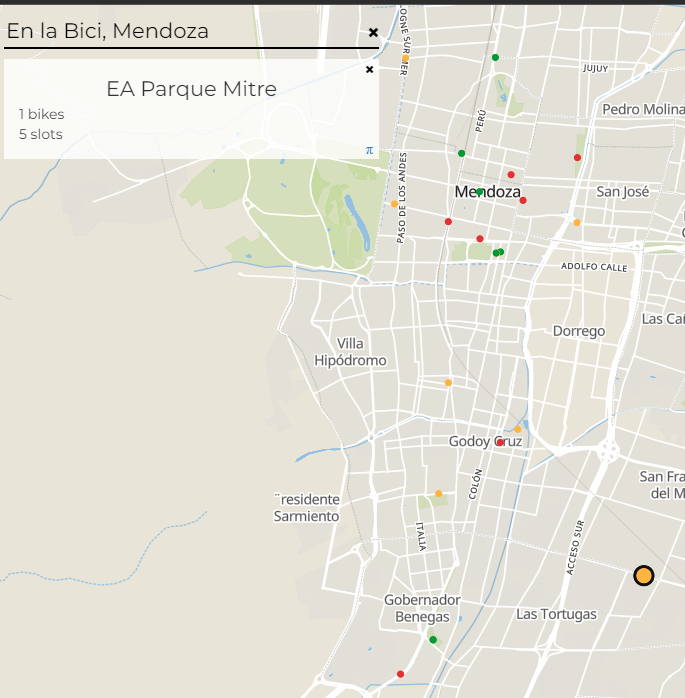

In [67]:
bikes_df_final = bikes_df.copy()

In [68]:
bikes_df_final = bikes_df_final[~((bikes_df_final['latitude'] == -32.9434) & (bikes_df_final['longitude'] == -68.818481))]
bikes_df_final = bikes_df_final.reset_index(drop=True)
bikes_df_final

,bike_stn_id,station_name,latitude,longitude,bikes_available,bikes_taken,bikes_total,percent_avail,percent_taken
0,1,Cultural,-32.884090,-68.848970,7,0,7,100.00,0.00
1,2,Plaza Independencia,-32.889500,-68.846000,17,0,17,100.00,0.00
2,3,Muni,-32.897942,-68.842463,7,0,7,100.00,0.00
3,4,Terminal,-32.893822,-68.829655,2,0,2,100.00,0.00
4,5,Benegas,-32.952390,-68.853749,10,0,10,100.00,0.00
5,6,Chacabuco,-32.916315,-68.851184,4,0,4,100.00,0.00
6,7,Pescarmona,-32.922855,-68.839564,5,0,5,100.00,0.00
7,8,Parque Lineal,-32.870624,-68.843329,8,0,8,100.00,0.00
8,9,EA Aristides,-32.891200,-68.860200,4,12,16,25.00,75.00
9,10,EA Muni,-32.898100,-68.843100,1,2,3,33.33,66.67


In [69]:
bikes_df_final.to_csv('../data/bikes_df_eda.csv', index=False)

## Foursquare Data

In [5]:
foursq_df = pd.read_csv('../data/foursquare_df_orig.csv')
foursq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categories  320 non-null    object 
 1   distance    320 non-null    int64  
 2   name        320 non-null    object 
 3   popularity  320 non-null    float64
 4   price       264 non-null    float64
 5   rating      233 non-null    float64
 6   latitude    320 non-null    float64
 7   longitude   320 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 20.1+ KB


In [6]:
foursq_df.describe()

,distance,popularity,price,rating,latitude,longitude
count,320.000000,320.000000,264.000000,233.000000,320.000000,320.000000
mean,713.109375,0.857798,1.359848,7.395708,-32.902977,-68.845451
std,691.718856,0.238506,0.561145,0.941238,0.022603,0.008348
min,85.000000,0.024234,1.000000,5.100000,-32.957213,-68.860200
25%,471.000000,0.903525,1.000000,6.700000,-32.898100,-68.851200
50%,680.500000,0.964340,1.000000,7.500000,-32.893822,-68.845900
75%,851.750000,0.985434,2.000000,8.000000,-32.889500,-68.840700
max,7641.000000,0.998870,3.000000,8.900000,-32.870624,-68.829600


Based on the high-level stats:

* There are some large outliers in 'distance'. This shouldn't be the case since the radius was set to 1000m.

    * This post discusses Foursquare radius and limit which may help explain why some distances are greater than 1000m. My API request had a radius of 1000m and a limit of 20 (default is 10). This may be why some results are further than 1000m. These will need to be removed.

        https://stackoverflow.com/questions/65706575/foursquare-apis-venue-searching-method-priority-limit-vs-radius

* No obvious concerns with popularity, price, and rating

* popularity has a scale from 0-1 (continuous); aligns with Foursquare description
* price has a range from 1-3 (discrete); aligns with with Foursquare description of possible values 1-4
* rating has a range from 5.1-8.9 (continuous); aligns with Foursquare description of possible values 0.0-9.0+

Foursquare Response Fields: https://location.foursquare.com/developer/reference/response-fields#core-data-fields

In [7]:
# Filter out rows from foursq_df where distance is less than or equal to 1000, put into fsdf_1 dataframe
fsdf_1 = foursq_df[foursq_df['distance'] <= 1000]
fsdf_1.describe()

,distance,popularity,price,rating,latitude,longitude
count,309.000000,309.000000,254.000000,227.000000,309.000000,309.000000
mean,638.669903,0.857024,1.374016,7.379295,-32.902618,-68.845430
std,242.171295,0.239541,0.567459,0.928775,0.022360,0.008322
min,85.000000,0.024234,1.000000,5.100000,-32.957213,-68.860200
25%,467.000000,0.904445,1.000000,6.700000,-32.898100,-68.851200
50%,673.000000,0.963963,1.000000,7.500000,-32.893822,-68.845900
75%,837.000000,0.985434,2.000000,8.000000,-32.889500,-68.840700
max,998.000000,0.998870,3.000000,8.900000,-32.870624,-68.829600


In [8]:
fsdf_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categories  309 non-null    object 
 1   distance    309 non-null    int64  
 2   name        309 non-null    object 
 3   popularity  309 non-null    float64
 4   price       254 non-null    float64
 5   rating      227 non-null    float64
 6   latitude    309 non-null    float64
 7   longitude   309 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 21.7+ KB


In [9]:
Q1_dist = foursq_df['distance'].quantile(0.25)
Q3_dist = foursq_df['distance'].quantile(0.75)
IQR_dist = Q3_dist - Q1_dist
print('IQR =', IQR_dist)
print('Lower Limit =', Q1_dist - 1.5 * IQR_dist)
print('Upper Limit =', Q3_dist + 1.5 * IQR_dist)
fsdf_2 = fsdf_1[~((fsdf_1['distance'] < (Q1_dist - 1.5 * IQR_dist)) | (fsdf_1['distance'] > (Q3_dist + 1.5 * IQR_dist)))]
# fsdf_2.describe()

IQR = 380.75
Lower Limit = -100.125
Upper Limit = 1422.875


In [10]:
z_scores_dist = np.abs(stats.zscore(fsdf_1['distance']))
fsdf_2 = fsdf_1[(z_scores_dist <3)]
fsdf_2.describe()

,distance,popularity,price,rating,latitude,longitude
count,309.000000,309.000000,254.000000,227.000000,309.000000,309.000000
mean,638.669903,0.857024,1.374016,7.379295,-32.902618,-68.845430
std,242.171295,0.239541,0.567459,0.928775,0.022360,0.008322
min,85.000000,0.024234,1.000000,5.100000,-32.957213,-68.860200
25%,467.000000,0.904445,1.000000,6.700000,-32.898100,-68.851200
50%,673.000000,0.963963,1.000000,7.500000,-32.893822,-68.845900
75%,837.000000,0.985434,2.000000,8.000000,-32.889500,-68.840700
max,998.000000,0.998870,3.000000,8.900000,-32.870624,-68.829600


## FS 'rating'
The 'rating' column has 227 non-null values out of 309, i.e. there are 82 nulls. Most of the other numeric columns such as distance and popularity have no nulls.

* Deleting the rows with missing 'rating' entirely would lose other useful data.
* Filling zeroes in place would bring down the average
* Since there's a slight left skew in 'rating', the median may be the better option for replacing null values in the rating column.

The approach will be to group the data by latitude/longitude. The median used to fill the null values will be the median for the group the null value falls into.

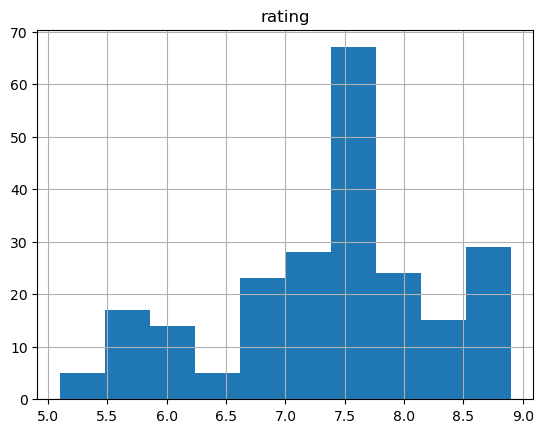

mean_rating= 7.379295154185022
median_rating 7.5
mode_rating= 7.7
skewness_rating= -0.38279874286512094


In [11]:
fsdf_2.hist(column='rating')
plt.show()
mean_rating = fsdf_2['rating'].mean()
median_rating = fsdf_2['rating'].median()
mode_rating = fsdf_2['rating'].mode()[0]
skewness_rating = fsdf_2['rating'].skew()
print('mean_rating=',mean_rating)
print('median_rating',median_rating)
print('mode_rating=',mode_rating)
print('skewness_rating=',skewness_rating)

This article discusses Foursquare radius and limit which may help explain why some distances are greater than 1000m. https://stackoverflow.com/questions/65706575/foursquare-apis-venue-searching-method-priority-limit-vs-radius

Changes:

Remove categories column
Remove rows where distance is greater than 1000m
groupby latitude/longitude and get value count of rows for each group
get avg, max, min distance for each location
get avg, max, min popularity for each location
https://datatofish.com/round-values-pandas-dataframe/

In [12]:
# drop column 'categories' as it will not be used for further analysis to create fsdf_3 dataframe 
fsdf_3 = fsdf_2.drop(columns=['categories'], axis=1)

In [13]:
# handle nulls in 'rating' 
# Create a new DataFrame with only the rows where 'rating' is null

fsdf_null_ratings = fsdf_3[fsdf_3['rating'].isnull()].reset_index()
fsdf_null_ratings

,index,distance,name,popularity,price,rating,latitude,longitude
0,66,304,Super Pancho Alem,0.516575,1.0,NaN,-32.893822,-68.829655
1,67,553,Buongiorno,0.736941,1.0,NaN,-32.893822,-68.829655
2,68,669,Tu Panaderia,0.439101,1.0,NaN,-32.893822,-68.829655
3,69,675,Café New Style,0.569186,1.0,NaN,-32.893822,-68.829655
4,70,734,Café Pellegrini,0.874184,1.0,NaN,-32.893822,-68.829655
...,...,...,...,...,...,...,...,...
77,315,797,Dorrego Sur Sandwich,0.501128,NaN,NaN,-32.924682,-68.842504
78,316,822,Gallego Pizza,0.956247,1.0,NaN,-32.924682,-68.842504
79,317,850,Cardamomo Resto,0.248083,NaN,NaN,-32.924682,-68.842504
80,318,900,San Francisco,0.775113,1.0,NaN,-32.870709,-68.858351


In [14]:
# Calculating rating median for each longitude/latitude group separately, to join with fsdf_null_ratings
rating_medians = fsdf_3.groupby(['longitude','latitude'])['rating'].median()#.reset_index()
rating_medians

longitude   latitude  
-68.860200  -32.891200    7.40
-68.859185  -32.957213    7.30
-68.858351  -32.870709     NaN
-68.853749  -32.952390    7.30
-68.853741  -32.952424    7.30
-68.852796  -32.931894     NaN
-68.851200  -32.893700    7.75
-68.851184  -32.916315    7.40
-68.848970  -32.884090    7.70
-68.846000  -32.889500    7.75
-68.845900  -32.896100    7.65
-68.843329  -32.870624    5.70
-68.843200  -32.898100    6.70
-68.843100  -32.898100    6.70
-68.842504  -32.924682    6.50
-68.842463  -32.897942    6.80
-68.840700  -32.887100    7.65
-68.839564  -32.922855    6.50
-68.838700  -32.890700    7.50
-68.829655  -32.893822    6.15
-68.829600  -32.884700    5.65
Name: rating, dtype: float64

In [15]:
# Merge the 'fsdf_null_ratings' DataFrame with the 'rating_medians' DataFrame
fsdf_null_ratings_merged = pd.merge(fsdf_null_ratings, rating_medians, on=['longitude', 'latitude'], suffixes=('', '_median'))

# Fill the null values in the 'rating' column with the 'rating_median' column
fsdf_null_ratings_merged['rating'] = fsdf_null_ratings_merged['rating'].fillna(fsdf_null_ratings_merged['rating_median'])

# # Drop the 'rating_median' column
fsdf_null_ratings_merged = fsdf_null_ratings_merged.drop(columns=['rating_median'])
fsdf_null_ratings_merged

,index,distance,name,popularity,price,rating,latitude,longitude
0,66,304,Super Pancho Alem,0.516575,1.0,6.15,-32.893822,-68.829655
1,67,553,Buongiorno,0.736941,1.0,6.15,-32.893822,-68.829655
2,68,669,Tu Panaderia,0.439101,1.0,6.15,-32.893822,-68.829655
3,69,675,Café New Style,0.569186,1.0,6.15,-32.893822,-68.829655
4,70,734,Café Pellegrini,0.874184,1.0,6.15,-32.893822,-68.829655
...,...,...,...,...,...,...,...,...
77,315,797,Dorrego Sur Sandwich,0.501128,NaN,6.50,-32.924682,-68.842504
78,316,822,Gallego Pizza,0.956247,1.0,6.50,-32.924682,-68.842504
79,317,850,Cardamomo Resto,0.248083,NaN,6.50,-32.924682,-68.842504
80,318,900,San Francisco,0.775113,1.0,NaN,-32.870709,-68.858351


In [16]:
# rating values that are still NaN. This is because there were no ratings for any entry in the group.
still_null_ratings = fsdf_null_ratings_merged[fsdf_null_ratings_merged['rating'].isnull()]
still_null_ratings

,index,distance,name,popularity,price,rating,latitude,longitude
63,292,230,Gasparetto,0.486243,2.0,NaN,-32.931894,-68.852796
64,293,555,Cardamomo Resto,0.248083,NaN,NaN,-32.931894,-68.852796
65,294,831,Big Bang Godoy Cruz,0.627424,NaN,NaN,-32.931894,-68.852796
66,295,933,Piemonte Pizzeria,0.656272,1.0,NaN,-32.931894,-68.852796
80,318,900,San Francisco,0.775113,1.0,NaN,-32.870709,-68.858351
81,319,927,Principe de Asturias-Eventos Catering,0.645028,1.0,NaN,-32.870709,-68.858351


In [17]:
fsdf_4 = fsdf_3.copy()
fsdf_4

,distance,name,popularity,price,rating,latitude,longitude
0,523,Azafran,0.998870,3.0,8.9,-32.884090,-68.848970
1,895,BRÖD Panadería,0.991713,1.0,8.9,-32.884090,-68.848970
2,514,Famiglia Perin,0.987067,1.0,8.8,-32.884090,-68.848970
3,865,Ceibo Restaurante,0.944375,2.0,8.6,-32.884090,-68.848970
4,194,Anna Bistro,0.992843,3.0,8.5,-32.884090,-68.848970
...,...,...,...,...,...,...,...
315,797,Dorrego Sur Sandwich,0.501128,NaN,NaN,-32.924682,-68.842504
316,822,Gallego Pizza,0.956247,1.0,NaN,-32.924682,-68.842504
317,850,Cardamomo Resto,0.248083,NaN,NaN,-32.924682,-68.842504
318,900,San Francisco,0.775113,1.0,NaN,-32.870709,-68.858351


In [18]:
fsdf_4.update(fsdf_null_ratings_merged.set_index('index'))
fsdf_4

,distance,name,popularity,price,rating,latitude,longitude
0,523,Azafran,0.998870,3.0,8.9,-32.884090,-68.848970
1,895,BRÖD Panadería,0.991713,1.0,8.9,-32.884090,-68.848970
2,514,Famiglia Perin,0.987067,1.0,8.8,-32.884090,-68.848970
3,865,Ceibo Restaurante,0.944375,2.0,8.6,-32.884090,-68.848970
4,194,Anna Bistro,0.992843,3.0,8.5,-32.884090,-68.848970
...,...,...,...,...,...,...,...
315,797,Dorrego Sur Sandwich,0.501128,NaN,6.5,-32.924682,-68.842504
316,822,Gallego Pizza,0.956247,1.0,6.5,-32.924682,-68.842504
317,850,Cardamomo Resto,0.248083,NaN,6.5,-32.924682,-68.842504
318,900,San Francisco,0.775113,1.0,NaN,-32.870709,-68.858351


In [19]:
fsdf_4_still_null_ratings = fsdf_4[fsdf_4['rating'].isnull()]
fsdf_4_still_null_ratings

,distance,name,popularity,price,rating,latitude,longitude
292,230,Gasparetto,0.486243,2.0,NaN,-32.931894,-68.852796
293,555,Cardamomo Resto,0.248083,NaN,NaN,-32.931894,-68.852796
294,831,Big Bang Godoy Cruz,0.627424,NaN,NaN,-32.931894,-68.852796
295,933,Piemonte Pizzeria,0.656272,1.0,NaN,-32.931894,-68.852796
318,900,San Francisco,0.775113,1.0,NaN,-32.870709,-68.858351
319,927,Principe de Asturias-Eventos Catering,0.645028,1.0,NaN,-32.870709,-68.858351


In [20]:
fsdf_4.info()
# remember to reset_index() later. reset_index(drop=True, inplace=True) to replace current index with default int ind

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    309 non-null    int64  
 1   name        309 non-null    object 
 2   popularity  309 non-null    float64
 3   price       254 non-null    float64
 4   rating      303 non-null    float64
 5   latitude    309 non-null    float64
 6   longitude   309 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 19.3+ KB


In [21]:
fsdf_4['rating'] = fsdf_4['rating'].fillna(0)
fsdf_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    309 non-null    int64  
 1   name        309 non-null    object 
 2   popularity  309 non-null    float64
 3   price       254 non-null    float64
 4   rating      309 non-null    float64
 5   latitude    309 non-null    float64
 6   longitude   309 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 19.3+ KB


In [22]:
fsdf_4.reset_index(drop=True, inplace=True)
fsdf_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    309 non-null    int64  
 1   name        309 non-null    object 
 2   popularity  309 non-null    float64
 3   price       254 non-null    float64
 4   rating      309 non-null    float64
 5   latitude    309 non-null    float64
 6   longitude   309 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 17.0+ KB


## FS 'price'

In [23]:
fsdf_5 = fsdf_4.copy()
fsdf_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    309 non-null    int64  
 1   name        309 non-null    object 
 2   popularity  309 non-null    float64
 3   price       254 non-null    float64
 4   rating      309 non-null    float64
 5   latitude    309 non-null    float64
 6   longitude   309 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 17.0+ KB


Price has 55 null values. Although, a number, it represents a category.

https://location.foursquare.com/developer/reference/response-fields#core-data-fields

Values include:
- 1 = Cheap
- 2 = Moderate
- 3 = Expensive
- 4 = Very Expensive.

The approach will be to group the data by latitude/longitude. The mode used to fill the null values will be the mode for the group the null value falls into.

In [24]:
# handle nulls in 'price' 
# Create a new DataFrame with only the rows where 'price' is null

fsdf_null_price = fsdf_5[fsdf_5['price'].isnull()].reset_index()
fsdf_null_price

,index,distance,name,popularity,price,rating,latitude,longitude
0,9,413,Bardot,0.989453,NaN,7.70,-32.884090,-68.848970
1,14,991,Confiteria & Pasteleria Die Oma,0.957810,NaN,7.60,-32.884090,-68.848970
2,15,628,Restaurant,0.090281,NaN,7.50,-32.884090,-68.848970
3,30,358,Bardot,0.989453,NaN,7.70,-32.889500,-68.846000
4,35,495,Berlina al Paso Mendoza,0.994726,NaN,7.60,-32.889500,-68.846000
5,36,315,Restaurant,0.090281,NaN,7.50,-32.889500,-68.846000
6,37,788,Don Aldo,0.963586,NaN,7.50,-32.889500,-68.846000
7,46,857,Berlina al Paso Mendoza,0.994726,NaN,7.60,-32.897942,-68.842463
8,73,896,Garibaldi Café & Birra,0.960949,NaN,6.15,-32.893822,-68.829655
9,78,960,Flashpoint Mendoza,0.048091,NaN,6.15,-32.893822,-68.829655


In [25]:
# Calculating price mode for each longitude/latitude group separately, to join with fsdf_null_price
# If there are multiple, it picks the first one (which is accepted)
price_modes = fsdf_5.groupby(['longitude','latitude'])['price'].apply(lambda x: x.mode()[0])
price_modes

longitude   latitude  
-68.860200  -32.891200    1.0
-68.859185  -32.957213    1.0
-68.858351  -32.870709    1.0
-68.853749  -32.952390    1.0
-68.853741  -32.952424    1.0
-68.852796  -32.931894    1.0
-68.851200  -32.893700    1.0
-68.851184  -32.916315    1.0
-68.848970  -32.884090    1.0
-68.846000  -32.889500    1.0
-68.845900  -32.896100    1.0
-68.843329  -32.870624    1.0
-68.843200  -32.898100    1.0
-68.843100  -32.898100    1.0
-68.842504  -32.924682    1.0
-68.842463  -32.897942    1.0
-68.840700  -32.887100    1.0
-68.839564  -32.922855    1.0
-68.838700  -32.890700    1.0
-68.829655  -32.893822    1.0
-68.829600  -32.884700    1.0
Name: price, dtype: float64

In [26]:
# Merge the 'fsdf_null_price' DataFrame with the 'price_modes' DataFrame
fsdf_null_price_merged = pd.merge(fsdf_null_price, price_modes, on=['longitude', 'latitude'], suffixes=('', '_mode'))

# Merge 'fsdf_null_price' with 'rating_price'
#fsdf_null_price_merged = fsdf_null_price.merge(price_medians, left_index=True, on=['longitude', 'latitude'], suffixes=('', '_median'))

# # Fill the null values in the 'price' column with the 'price_mode' column
fsdf_null_price_merged['price'] = fsdf_null_price_merged['price'].fillna(fsdf_null_price_merged['price_mode'])

# # Drop the 'price_mode' column
fsdf_null_price_merged = fsdf_null_price_merged.drop(columns=['price_mode'])
fsdf_null_price_merged

,index,distance,name,popularity,price,rating,latitude,longitude
0,9,413,Bardot,0.989453,1.0,7.70,-32.884090,-68.848970
1,14,991,Confiteria & Pasteleria Die Oma,0.957810,1.0,7.60,-32.884090,-68.848970
2,15,628,Restaurant,0.090281,1.0,7.50,-32.884090,-68.848970
3,30,358,Bardot,0.989453,1.0,7.70,-32.889500,-68.846000
4,35,495,Berlina al Paso Mendoza,0.994726,1.0,7.60,-32.889500,-68.846000
5,36,315,Restaurant,0.090281,1.0,7.50,-32.889500,-68.846000
6,37,788,Don Aldo,0.963586,1.0,7.50,-32.889500,-68.846000
7,46,857,Berlina al Paso Mendoza,0.994726,1.0,7.60,-32.897942,-68.842463
8,73,896,Garibaldi Café & Birra,0.960949,1.0,6.15,-32.893822,-68.829655
9,78,960,Flashpoint Mendoza,0.048091,1.0,6.15,-32.893822,-68.829655


In [27]:
fsdf_6 = fsdf_5.copy()
fsdf_6

,distance,name,popularity,price,rating,latitude,longitude
0,523,Azafran,0.998870,3.0,8.9,-32.884090,-68.848970
1,895,BRÖD Panadería,0.991713,1.0,8.9,-32.884090,-68.848970
2,514,Famiglia Perin,0.987067,1.0,8.8,-32.884090,-68.848970
3,865,Ceibo Restaurante,0.944375,2.0,8.6,-32.884090,-68.848970
4,194,Anna Bistro,0.992843,3.0,8.5,-32.884090,-68.848970
...,...,...,...,...,...,...,...
304,797,Dorrego Sur Sandwich,0.501128,NaN,6.5,-32.924682,-68.842504
305,822,Gallego Pizza,0.956247,1.0,6.5,-32.924682,-68.842504
306,850,Cardamomo Resto,0.248083,NaN,6.5,-32.924682,-68.842504
307,900,San Francisco,0.775113,1.0,0.0,-32.870709,-68.858351


In [28]:
fsdf_6.update(fsdf_null_price_merged.set_index('index'))
fsdf_6

,distance,name,popularity,price,rating,latitude,longitude
0,523,Azafran,0.998870,3.0,8.9,-32.884090,-68.848970
1,895,BRÖD Panadería,0.991713,1.0,8.9,-32.884090,-68.848970
2,514,Famiglia Perin,0.987067,1.0,8.8,-32.884090,-68.848970
3,865,Ceibo Restaurante,0.944375,2.0,8.6,-32.884090,-68.848970
4,194,Anna Bistro,0.992843,3.0,8.5,-32.884090,-68.848970
...,...,...,...,...,...,...,...
304,797,Dorrego Sur Sandwich,0.501128,1.0,6.5,-32.924682,-68.842504
305,822,Gallego Pizza,0.956247,1.0,6.5,-32.924682,-68.842504
306,850,Cardamomo Resto,0.248083,1.0,6.5,-32.924682,-68.842504
307,900,San Francisco,0.775113,1.0,0.0,-32.870709,-68.858351


In [29]:
fsdf_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    309 non-null    int64  
 1   name        309 non-null    object 
 2   popularity  309 non-null    float64
 3   price       309 non-null    float64
 4   rating      309 non-null    float64
 5   latitude    309 non-null    float64
 6   longitude   309 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 17.0+ KB


In [30]:
fsdf_7 = fsdf_6.copy()

## Working on Foursquare Main Table

In [32]:
fsdf_grouped = fsdf_7.groupby(['longitude','latitude']).agg({
    'distance': ['mean', 'max', 'min'],
    'name': ['count'],
    'popularity': ['mean', 'max', 'min'],
    'price': ['mean', 'max', 'min'],
    'rating': ['mean', 'max', 'min']
})

fsdf_grouped.columns = [
    'fs_distance_avg', 
    'fs_distance_max', 
    'fs_distance_min', 
    'fs_name_count',
    'fs_popularity_avg', 
    'fs_popularity_max', 
    'fs_popularity_min', 
    'fs_price_avg', 
    'fs_price_max', 
    'fs_price_min', 
    'fs_rating_avg', 
    'fs_rating_max', 
    'fs_rating_min'
]

# reset index
fsdf_group = fsdf_grouped.reset_index().round({
    'fs_distance_avg': 2,
    'fs_distance_max': 2,
    'fs_distance_min': 2 ,
    'fs_name_count': 0,
    'fs_popularity_avg': 6 ,
    'fs_popularity_max': 6,
    'fs_popularity_min': 6,
    'fs_price_avg': 2 ,
    'fs_price_max': 2,
    'fs_price_min': 2,
    'fs_rating_avg': 2,
    'fs_rating_max': 2,
    'fs_rating_min': 2
})

fsdf_grp_final = fsdf_group.reset_index(drop=True)
fsdf_grp_final 

,longitude,latitude,fs_distance_avg,fs_distance_max,fs_distance_min,fs_name_count,fs_popularity_avg,fs_popularity_max,fs_popularity_min,fs_price_avg,fs_price_max,fs_price_min,fs_rating_avg,fs_rating_max,fs_rating_min
0,-68.860200,-32.891200,543.79,957,130,19,0.857484,0.996233,0.024234,1.32,2.0,1.0,7.15,8.4,5.7
1,-68.859185,-32.957213,311.92,811,127,13,0.884112,0.988272,0.131258,1.38,2.0,1.0,7.18,8.0,5.4
2,-68.858351,-32.870709,913.50,927,900,2,0.710070,0.775113,0.645028,1.00,1.0,1.0,0.00,0.0,0.0
3,-68.853749,-32.952390,553.00,947,182,13,0.884112,0.988272,0.131258,1.38,2.0,1.0,7.18,8.0,5.4
4,-68.853741,-32.952424,551.77,943,185,13,0.884112,0.988272,0.131258,1.38,2.0,1.0,7.18,8.0,5.4
5,-68.852796,-32.931894,637.25,933,230,4,0.504506,0.656272,0.248083,1.25,2.0,1.0,0.00,0.0,0.0
6,-68.851200,-32.893700,594.75,952,252,20,0.929740,0.998870,0.090281,1.45,3.0,1.0,7.96,8.9,7.3
7,-68.851184,-32.916315,743.08,973,482,13,0.724941,0.995940,0.066298,1.23,2.0,1.0,7.23,8.5,5.5
8,-68.848970,-32.884090,582.25,991,164,20,0.931485,0.998870,0.090281,1.45,3.0,1.0,7.92,8.9,7.1
9,-68.846000,-32.889500,480.00,987,136,20,0.934367,0.998870,0.090281,1.50,3.0,1.0,8.00,8.9,7.4


In [47]:
fsdf_grp_final.to_csv('../data/fs_df_eda.csv', index=False)

## Yelp Data

In [49]:
yelp_df = pd.read_csv('../data/yelp_df_orig.csv')
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             278 non-null    object 
 1   alias          278 non-null    object 
 2   name           278 non-null    object 
 3   image_url      215 non-null    object 
 4   is_closed      278 non-null    bool   
 5   url            278 non-null    object 
 6   review_count   278 non-null    int64  
 7   categories     278 non-null    object 
 8   rating         278 non-null    float64
 9   coordinates    278 non-null    object 
 10  transactions   278 non-null    object 
 11  price          140 non-null    object 
 12  location       278 non-null    object 
 13  phone          263 non-null    float64
 14  display_phone  263 non-null    object 
 15  distance       278 non-null    float64
 16  latitude       278 non-null    float64
 17  longitude      278 non-null    float64
dtypes: bool(1)

In [50]:
yelp_df.describe()

,review_count,rating,phone,distance,latitude,longitude
count,278.000000,278.000000,2.630000e+02,278.000000,278.000000,278.000000
mean,8.931655,3.663669,7.307609e+11,753.217592,-32.900643,-68.845776
std,14.656808,1.696038,9.485128e+11,285.716783,0.020149,0.007629
min,0.000000,0.000000,5.411043e+11,135.823997,-32.957213,-68.860200
25%,1.000000,4.000000,5.426142e+11,543.077720,-32.898100,-68.851200
50%,4.000000,4.500000,5.426143e+11,805.469033,-32.893822,-68.843329
75%,8.000000,4.875000,5.426143e+11,954.258938,-32.889500,-68.842463
max,66.000000,5.000000,5.492617e+12,1249.445796,-32.870624,-68.818481


Remove columns:'id', 'alias', 'name', 'image_url', 'is_closed','url', 'categories', 'coordinates', 'transactions', 'location', 'phone',	'display_phone'

Distance goes beyond 1000m, need to filter these out.

In [51]:
#Filter out rows from yelp_df where distance is less than or equal to 1000, put into ypdf_1
ypdf_1 = yelp_df[yelp_df['distance'] <= 1000]

#Drop columns that will not be used
ypdf_2 = ypdf_1.drop(columns=['id', 'alias', 'image_url', 'is_closed','url', 'categories', 'coordinates', 'transactions', 'location', 'phone',	'display_phone'], axis=1)

ypdf_2.describe()

,review_count,rating,distance,latitude,longitude
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,8.740909,3.729545,658.044920,-32.900252,-68.846599
std,14.765477,1.658874,241.263924,0.020856,0.007350
min,0.000000,0.000000,135.823997,-32.957213,-68.860200
25%,1.000000,4.000000,488.286996,-32.898100,-68.851200
50%,4.000000,4.500000,706.909666,-32.893700,-68.845900
75%,8.000000,5.000000,864.079613,-32.889500,-68.842463
max,66.000000,5.000000,994.146870,-32.870624,-68.818481


In [52]:
ypdf_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 277
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          220 non-null    object 
 1   review_count  220 non-null    int64  
 2   rating        220 non-null    float64
 3   price         109 non-null    object 
 4   distance      220 non-null    float64
 5   latitude      220 non-null    float64
 6   longitude     220 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 13.8+ KB


In [53]:
ypdf_2.head()

,name,review_count,rating,price,distance,latitude,longitude
0,Cachita's,7,5.0,$$,526.499634,-32.88409,-68.84897
1,La Barra,5,5.0,$$$,645.835522,-32.88409,-68.84897
2,Unión,5,5.0,NaN,509.795344,-32.88409,-68.84897
3,Cordillera Vinos y Fuegos,13,4.5,$$$,612.792296,-32.88409,-68.84897
4,Silla 14,8,4.5,$$,922.494041,-32.88409,-68.84897


Price seems to be an unreliable column. There are 111 null values (~50% of all results)

In [54]:
# Update $ in 'price' column to number
ypdf_2['price']=ypdf_2['price'].replace(['$', '$$', '$$$', '$$$$'],[1, 2, 3, 4])
ypdf_2.head()

,name,review_count,rating,price,distance,latitude,longitude
0,Cachita's,7,5.0,2.0,526.499634,-32.88409,-68.84897
1,La Barra,5,5.0,3.0,645.835522,-32.88409,-68.84897
2,Unión,5,5.0,NaN,509.795344,-32.88409,-68.84897
3,Cordillera Vinos y Fuegos,13,4.5,3.0,612.792296,-32.88409,-68.84897
4,Silla 14,8,4.5,2.0,922.494041,-32.88409,-68.84897


In [55]:
#Create new dataframe with only 'price' null values

ypdf_null_price = ypdf_2[ypdf_2['price'].isnull()].reset_index()
ypdf_null_price

,index,name,review_count,rating,price,distance,latitude,longitude
0,2,Unión,5,5.0,NaN,509.795344,-32.884090,-68.848970
1,6,Tasting Patagonia,4,5.0,NaN,535.215223,-32.884090,-68.848970
2,11,Caché Bistro,2,5.0,NaN,538.082009,-32.884090,-68.848970
3,12,Santa y Pecador,2,5.0,NaN,563.197055,-32.884090,-68.848970
4,17,El Ceibo,5,4.0,NaN,860.121532,-32.884090,-68.848970
...,...,...,...,...,...,...,...,...
106,270,Matias - Parrillada,0,0.0,NaN,908.542220,-32.924682,-68.842504
107,274,Aldo Pizzeria Sandwicheria Restaurante - Delivery,1,3.0,NaN,726.297313,-32.870709,-68.858351
108,275,la Paulina Pizzeria - Delivery,0,0.0,NaN,944.414799,-32.870709,-68.858351
109,276,Pizzas Artesanales Amarello,0,0.0,NaN,309.511561,-32.870709,-68.858351


In [56]:
# There are no many blanks to fill with a meaningful values. 'price' null values will be filled with 0
ypdf_3 = ypdf_2.copy()
ypdf_3['price'] = ypdf_3['price'].fillna(0)
ypdf_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 277
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          220 non-null    object 
 1   review_count  220 non-null    int64  
 2   rating        220 non-null    float64
 3   price         220 non-null    float64
 4   distance      220 non-null    float64
 5   latitude      220 non-null    float64
 6   longitude     220 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [57]:
# Reset index since .info() showed 220 entries, 0 to 277
ypdf_4 = ypdf_3.copy()
ypdf_4.reset_index(drop=True, inplace=True)
ypdf_4

,name,review_count,rating,price,distance,latitude,longitude
0,Cachita's,7,5.0,2.0,526.499634,-32.884090,-68.848970
1,La Barra,5,5.0,3.0,645.835522,-32.884090,-68.848970
2,Unión,5,5.0,0.0,509.795344,-32.884090,-68.848970
3,Cordillera Vinos y Fuegos,13,4.5,3.0,612.792296,-32.884090,-68.848970
4,Silla 14,8,4.5,2.0,922.494041,-32.884090,-68.848970
...,...,...,...,...,...,...,...
215,Matias - Parrillada,0,0.0,0.0,908.542220,-32.924682,-68.842504
216,Aldo Pizzeria Sandwicheria Restaurante - Delivery,1,3.0,0.0,726.297313,-32.870709,-68.858351
217,la Paulina Pizzeria - Delivery,0,0.0,0.0,944.414799,-32.870709,-68.858351
218,Pizzas Artesanales Amarello,0,0.0,0.0,309.511561,-32.870709,-68.858351


## Working on Yelp Main Table

In [58]:
ypdf_5 = ypdf_4.copy()

In [59]:
ypdf_grouped = ypdf_5.groupby(['longitude','latitude']).agg({
    'distance': ['mean', 'max', 'min'],
    'name': ['count'],
    'review_count': ['mean', 'max', 'min'],
    'price': ['mean', 'max', 'min'],
    'rating': ['mean', 'max', 'min']
})

ypdf_grouped.columns = [
    'yp_distance_avg', 
    'yp_distance_max', 
    'yp_distance_min', 
    'yp_name_count',
    'yp_review_count_avg', 
    'yp_review_count_max', 
    'yp_review_count_min', 
    'yp_price_avg', 
    'yp_price_max', 
    'yp_price_min', 
    'yp_rating_avg', 
    'yp_rating_max', 
    'yp_rating_min'
]

# reset index
ypdf_group = ypdf_grouped.reset_index().round({
    'yp_distance_avg': 2,
    'yp_distance_max': 2,
    'yp_distance_min': 2,
    'yp_name_count': 0,
    'yp_review_count_avg': 2,
    'yp_review_count_max': 2,
    'yp_review_count_min': 2,
    'yp_price_avg': 2 ,
    'yp_price_max': 2,
    'yp_price_min': 2,
    'yp_rating_avg': 2,
    'yp_rating_max': 2,
    'yp_rating_min': 2
})

ypdf_grp = ypdf_group.reset_index(drop=True)
ypdf_grp 

,longitude,latitude,yp_distance_avg,yp_distance_max,yp_distance_min,yp_name_count,yp_review_count_avg,yp_review_count_max,yp_review_count_min,yp_price_avg,yp_price_max,yp_price_min,yp_rating_avg,yp_rating_max,yp_rating_min
0,-68.860200,-32.891200,613.31,974.41,143.44,17,7.65,21,1,1.71,3.0,0.0,4.35,5.0,3.5
1,-68.859185,-32.957213,453.05,976.82,180.28,7,0.71,2,0,0.29,2.0,0.0,1.50,5.0,0.0
2,-68.858351,-32.870709,676.63,944.41,309.51,4,0.25,1,0,0.00,0.0,0.0,0.75,3.0,0.0
3,-68.853749,-32.952390,657.41,938.78,436.22,7,0.71,2,0,0.29,2.0,0.0,1.50,5.0,0.0
4,-68.853741,-32.952424,657.04,935.51,439.79,7,0.71,2,0,0.29,2.0,0.0,1.50,5.0,0.0
5,-68.852796,-32.931894,511.88,778.77,342.83,4,0.00,0,0,0.00,0.0,0.0,0.00,0.0,0.0
6,-68.851200,-32.893700,534.40,954.79,146.88,20,13.85,66,1,1.70,4.0,0.0,4.50,5.0,4.0
7,-68.851184,-32.916315,830.93,877.83,771.78,3,13.67,38,1,2.00,4.0,0.0,3.00,4.0,1.0
8,-68.848970,-32.884090,618.44,922.49,208.92,17,15.94,66,2,1.82,4.0,0.0,4.56,5.0,4.0
9,-68.846000,-32.889500,398.06,876.77,143.44,19,16.26,66,2,1.79,4.0,0.0,4.50,5.0,4.0


In [60]:
#Creating a copy before dropping "Parque EA Mitre" at latitude=-32.9434 & longitude=-68.818481
ypdf_grp_final = ypdf_grp.copy()

In [61]:
# Dropping bike station "Parque EA Mitre" at latitude=-32.9434 & longitude=-68.818481
ypdf_grp_final = ypdf_grp_final[~((ypdf_grp_final['latitude'] == -32.9434) & (ypdf_grp_final['longitude'] == -68.818481))]
ypdf_grp_final = ypdf_grp_final.reset_index(drop=True)
ypdf_grp_final

,longitude,latitude,yp_distance_avg,yp_distance_max,yp_distance_min,yp_name_count,yp_review_count_avg,yp_review_count_max,yp_review_count_min,yp_price_avg,yp_price_max,yp_price_min,yp_rating_avg,yp_rating_max,yp_rating_min
0,-68.860200,-32.891200,613.31,974.41,143.44,17,7.65,21,1,1.71,3.0,0.0,4.35,5.0,3.5
1,-68.859185,-32.957213,453.05,976.82,180.28,7,0.71,2,0,0.29,2.0,0.0,1.50,5.0,0.0
2,-68.858351,-32.870709,676.63,944.41,309.51,4,0.25,1,0,0.00,0.0,0.0,0.75,3.0,0.0
3,-68.853749,-32.952390,657.41,938.78,436.22,7,0.71,2,0,0.29,2.0,0.0,1.50,5.0,0.0
4,-68.853741,-32.952424,657.04,935.51,439.79,7,0.71,2,0,0.29,2.0,0.0,1.50,5.0,0.0
5,-68.852796,-32.931894,511.88,778.77,342.83,4,0.00,0,0,0.00,0.0,0.0,0.00,0.0,0.0
6,-68.851200,-32.893700,534.40,954.79,146.88,20,13.85,66,1,1.70,4.0,0.0,4.50,5.0,4.0
7,-68.851184,-32.916315,830.93,877.83,771.78,3,13.67,38,1,2.00,4.0,0.0,3.00,4.0,1.0
8,-68.848970,-32.884090,618.44,922.49,208.92,17,15.94,66,2,1.82,4.0,0.0,4.56,5.0,4.0
9,-68.846000,-32.889500,398.06,876.77,143.44,19,16.26,66,2,1.79,4.0,0.0,4.50,5.0,4.0


In [62]:
ypdf_grp_final.to_csv('../data/yp_df_eda.csv', index=False)